<a href="https://colab.research.google.com/github/NovitaDian20/NovitaDian20-Modelling-Machine-Learning-for-Marketing-Analytic/blob/main/MarketingAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data FMCG, (fast moving consumer good), terdiri dari 2000 individual

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

In [ ]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


C:\Users\andi\anaconda3\envs\telkom\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

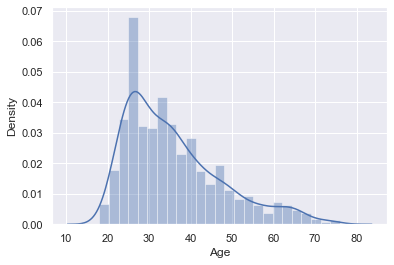

In [ ]:
sns.distplot(df_segmentation['Age'])

C:\Users\andi\anaconda3\envs\telkom\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

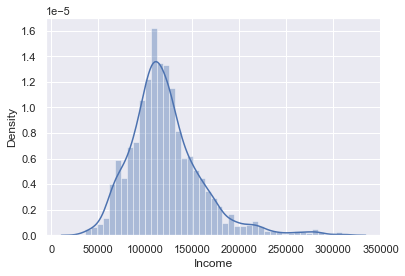

In [ ]:
sns.distplot(df_segmentation['Income'])

In [ ]:
df_segmentation['Marital status'].value_counts()

0    1007
1     993
Name: Marital status, dtype: int64

<AxesSubplot:xlabel='Marital status', ylabel='count'>

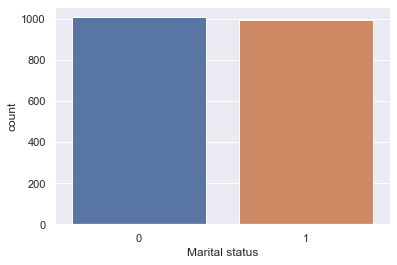

In [ ]:
sns.countplot(x='Marital status', data=df_segmentation)

In [ ]:
df_segmentation['Education'].value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

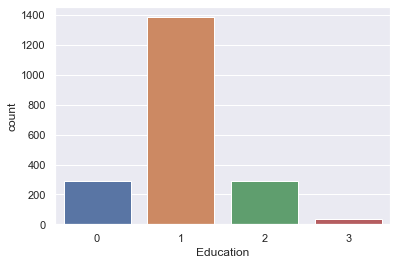

In [ ]:
sns.countplot(x='Education', data=df_segmentation)

In [ ]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


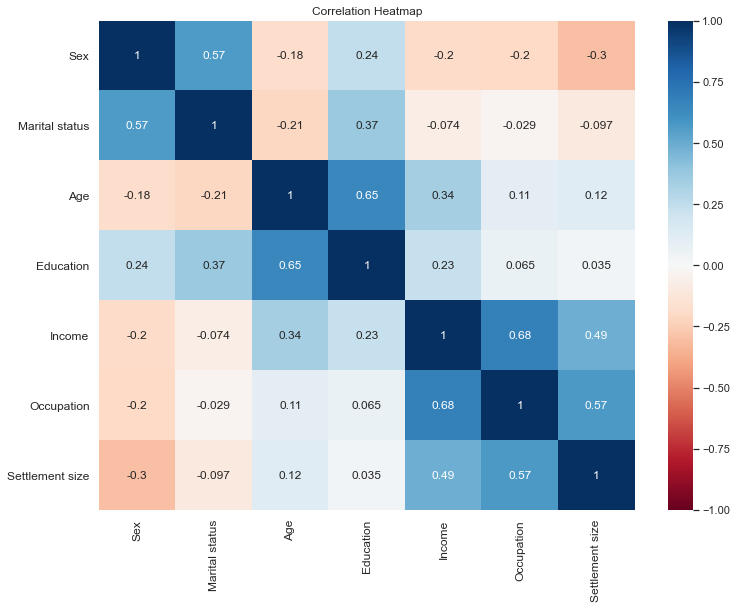

In [ ]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

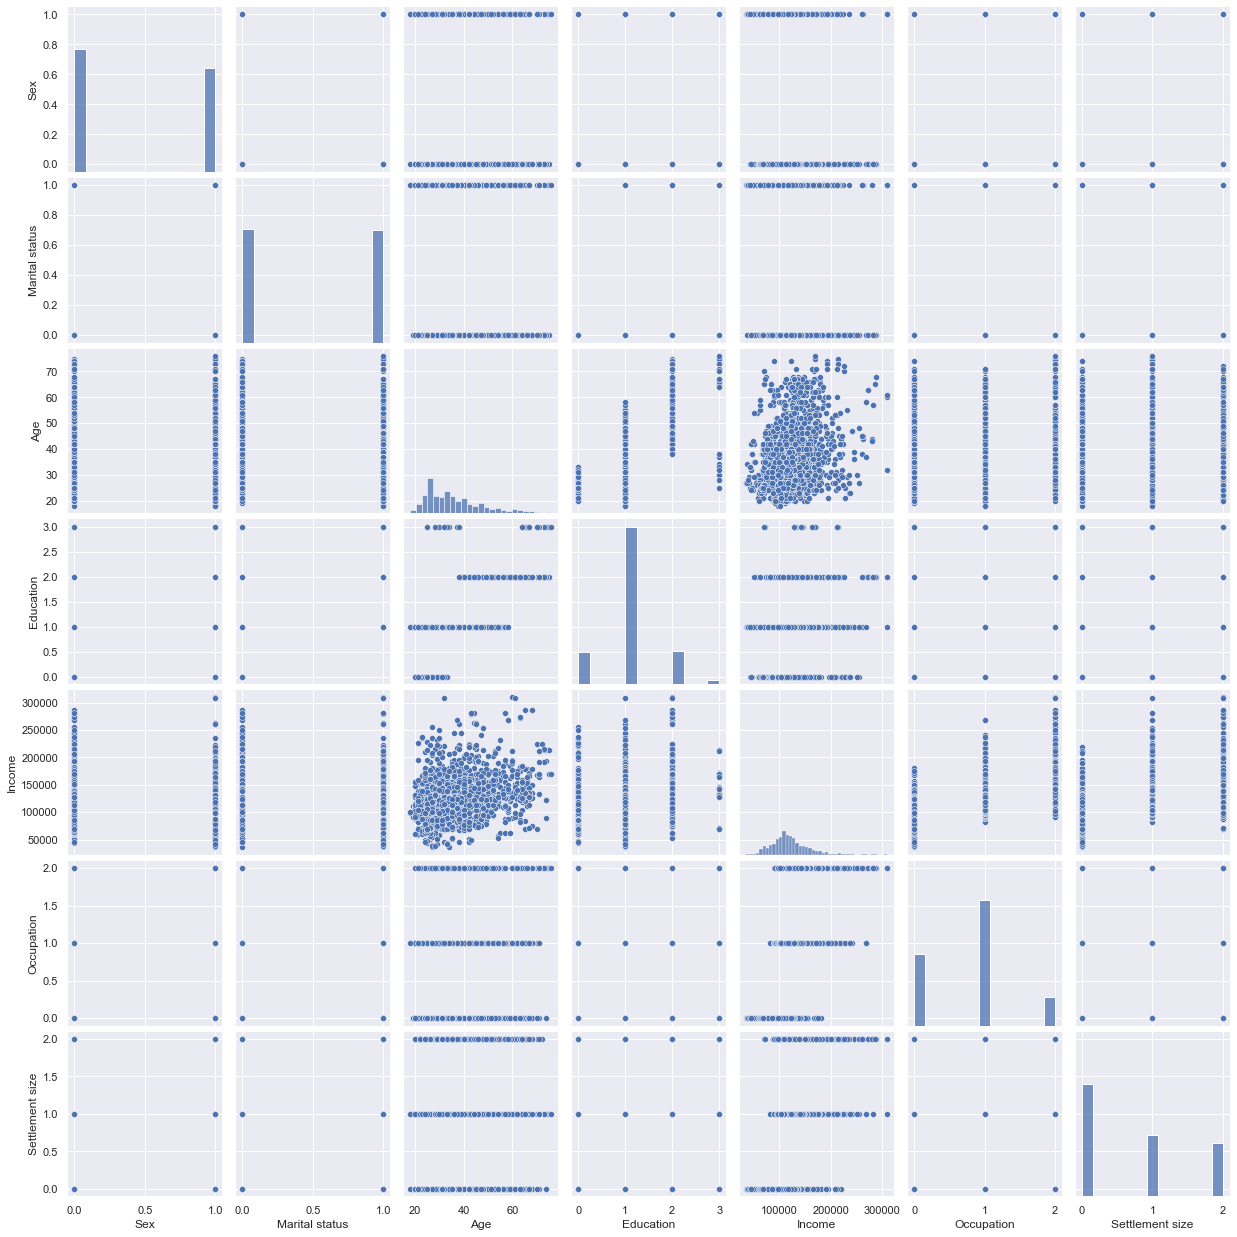

In [ ]:
sns.pairplot(df_segmentation)

Text(0.5, 1.0, 'Visualization of raw data')

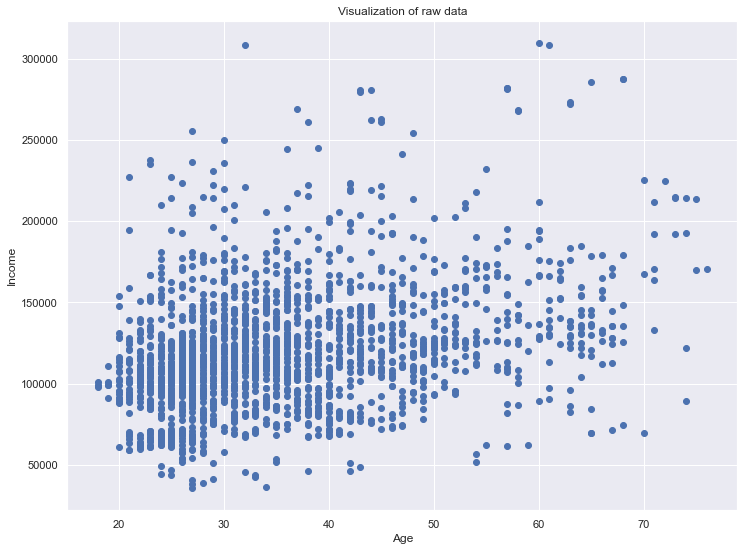

In [ ]:
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [ ]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Hierarchical Clustering

In [1]:
hier_clust = linkage(segmentation_std, method = 'ward')

NameError: ignored

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           show_leaf_counts = False,
           no_labels = True,
           color_threshold=0)
plt.show()

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold=0)
plt.show()

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

## K-MEANS CLustering

In [ ]:
# Iteration to do clustering with 1-11 cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

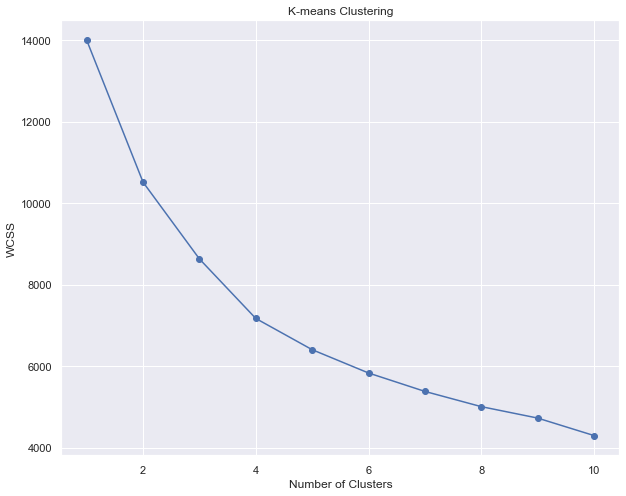

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [ ]:
#the prediction of which cluster a data belongs to can be extracted from labels_
kmeans.labels_

array([0, 2, 1, ..., 1, 2, 1])

In [ ]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment'] = kmeans.labels_

In [ ]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,2
100001998,0,0,31,0,86400,0,0,1


## get insight about characteristics of the people in each cluster

In [ ]:
##calculate the mean value of each features by cluster
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


- segment 0 well-off, avg age 56. oldest segment. 2/3 marrid, highest education, highest income
- segment 1 fewer opportunities 2/3 male, almost all single, age middle, education low compare to other segment, living in small city
- segment 2 average/standard
- segment 3 career focused, live in big/medium city


## mengkalkulasi ukuran dan proporsi tiap2 segment 

In [ ]:
df_segm_analysis['NObs']= df_segm_kmeans[['Segment','Sex']].groupby(['Segment']).count()

In [ ]:
df_segm_analysis['PropObs'] = df_segm_analysis['NObs']/df_segm_analysis['NObs'].sum()

In [ ]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,NObs,PropObs
Segment,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


## Visualization, use orginal unstandardize data and map label to each data

In [ ]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment'].map({0:'well-off',
                1:'fewer-opportunities',2:'standard',3:'career focused'})

In [ ]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,2,standard
100000003,0,0,49,1,89210,0,0,1,fewer-opportunities
100000004,0,0,45,1,171565,1,1,3,career focused
100000005,0,0,53,1,149031,1,1,3,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer-opportunities
100001997,1,1,27,1,117744,1,0,2,standard
100001998,0,0,31,0,86400,0,0,1,fewer-opportunities


C:\Users\andi\anaconda3\envs\telkom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


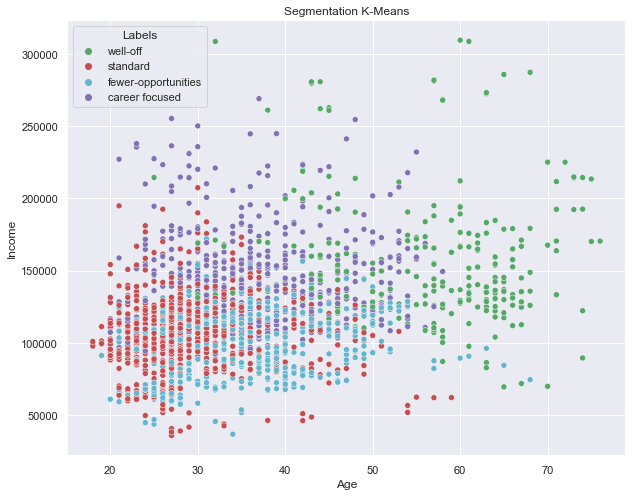

In [ ]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette= ['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

## Principal Component Analysis (PCA)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(segmentation_std)

PCA()

In [ ]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [ ]:
0.35696328 + 0.26250923 + 0.18821114 + 0.0755775 + 0.05716512 + 0.03954794 + 0.02002579

0.9999999999999999

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.35696328, 0.61947251, 0.80768365])

Text(0, 0.5, 'Cumulative Explained Variance')

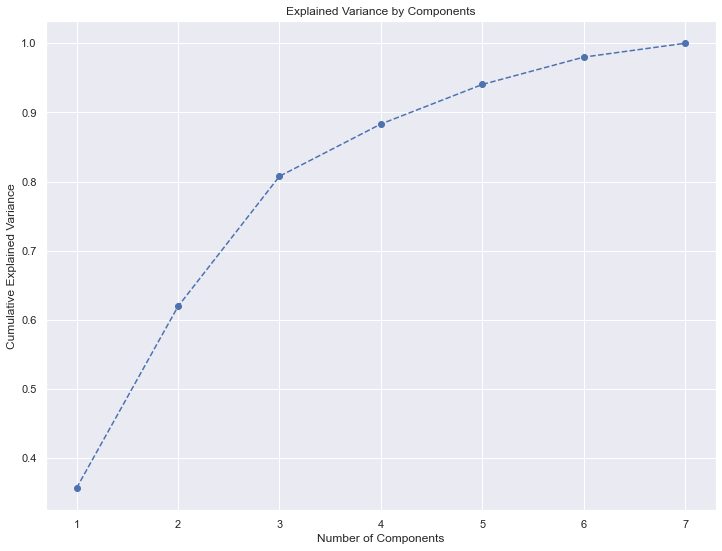

In [ ]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [ ]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)


## PCA result

In [ ]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x22dd084f490>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

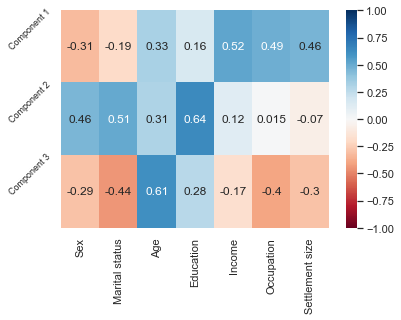

In [ ]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [ ]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
scores_pca = pca.transform(segmentation_std)

In [ ]:
scores_pca.shape

(2000, 3)

In [ ]:
pc_df = pd.DataFrame(scores_pca, columns=['PC 1', 'PC 2', 'PC 3'])

In [ ]:
pc_df

,PC 1,PC 2,PC 3
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909
...,...,...,...
1995,-0.866034,0.298330,1.438958
1996,-1.114957,0.794727,-1.079871
1997,-1.452298,-2.235937,0.896571
1998,-2.241453,0.627108,-0.530456


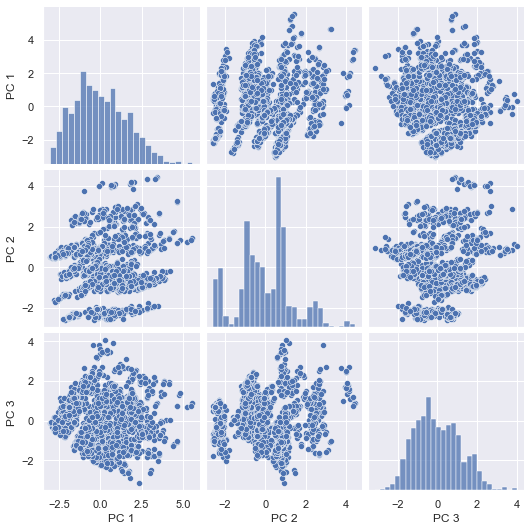

In [ ]:
sns.pairplot(pc_df)

### ${\textbf{K-means clustering with PCA}}$

In [ ]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

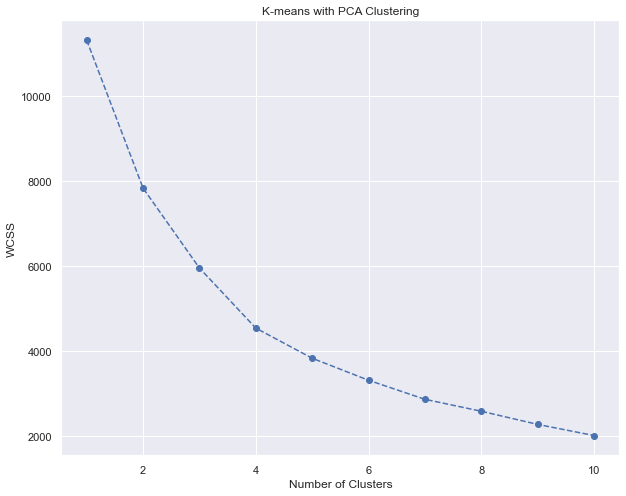

In [ ]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [ ]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [ ]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [ ]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

C:\Users\andi\anaconda3\envs\telkom\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


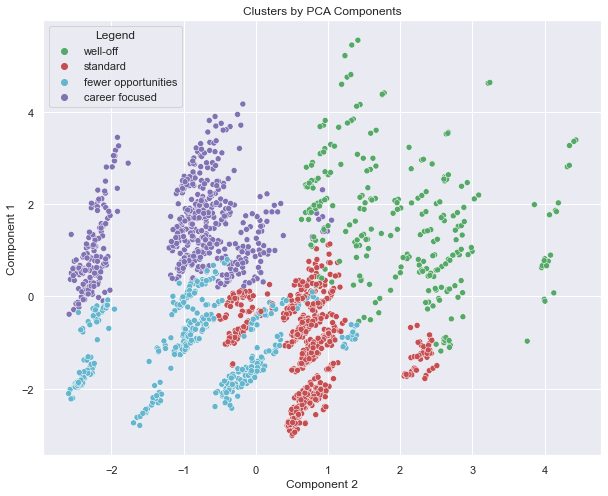

In [ ]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

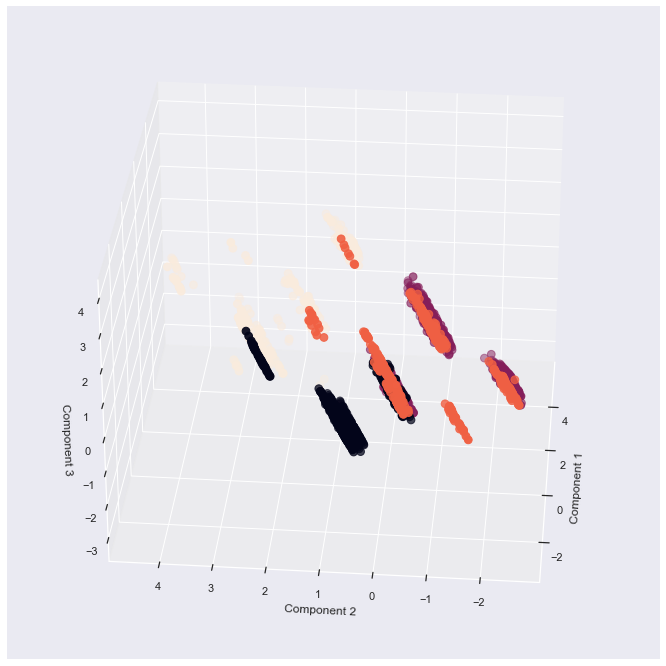

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
xs = df_segm_pca_kmeans['Component 1']
ys = df_segm_pca_kmeans['Component 2']
zs = df_segm_pca_kmeans['Component 3']
c = df_segm_pca_kmeans['Segment K-means PCA']
ax.scatter(xs,ys,zs, s=60, c= c)
ax.view_init(30, 185)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()